# Airbnb Rental Price Prediction using PyTorch

#### Context

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.
#### Content

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions. (Text Data)
#### Acknowledgements

This public dataset is part of Airbnb, and the original source can be found on this [website](http://insideairbnb.com/).

#### Task Details (Regression)

As of August 2019, this data set contains almost 50 thousand airbnb listings in NYC. The purpose of this task is to predict the price of NYC Airbnb rentals based on the data provided and any external dataset(s) with relevant information.

In [95]:
# Import necessary library for cleansing and EDA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Data Preparation - Loading and Cleansing

In [3]:
df = pd.read_csv("AB_NYC_2019.csv")

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Checking for null or empty values

In [5]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

For entries with no name just giving dummy name. Since more than enough data is missing we drop review columns

In [6]:
df.fillna({"name": "noname", "host_name": "noname"}, axis=0, inplace=True)

In [7]:
df.drop(["last_review", "reviews_per_month"], axis=1, inplace=True)

In [8]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [9]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


Checking datat types of each column

In [10]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Data Analysis

**Is there any change in price with neighbourhood group? What is the maximum price visible?**

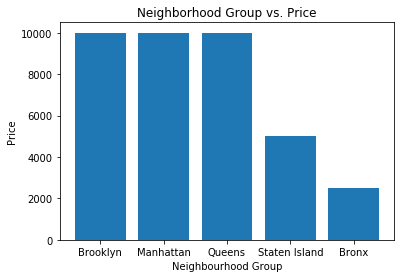

In [12]:
plt.figure()
plt.bar(df.neighbourhood_group, df.price)
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price")
plt.title("Neighborhood Group vs. Price")
plt.show()

From above plot it is very clear that, there is change in price with neighbourhood group. Brooklyn, Manhattan, Queens have maximum price. Maximum price shown here is 10K

**What is the price change with room type?**

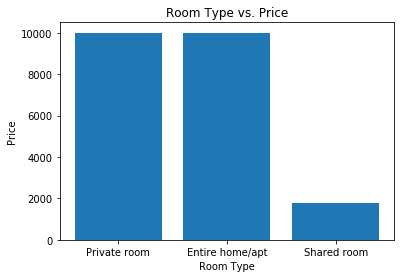

In [13]:
plt.figure()
plt.bar(df.room_type, df.price)
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.title("Room Type vs. Price")
plt.show()

Above graph explains how price varies with room type

**Does room type depend on neighbourhood? Which neighbourhood have more number of private rooms?**

In [58]:
df_gp = df.groupby(["neighbourhood_group", "room_type"], as_index=True).size()
df_gp

neighbourhood_group  room_type      
Bronx                Entire home/apt      379
                     Private room         652
                     Shared room           60
Brooklyn             Entire home/apt     9559
                     Private room       10132
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Entire home/apt     2096
                     Private room        3372
                     Shared room          198
Staten Island        Entire home/apt      176
                     Private room         188
                     Shared room            9
dtype: int64

In [92]:
d = pd.pivot_table(df[['neighbourhood_group', 'room_type', 'host_id']], index = 'neighbourhood_group',
               columns = 'room_type',aggfunc ='count')

         room_type      
host_id  Entire home/apt    379
         Private room       652
         Shared room         60
Name: Bronx, dtype: int64

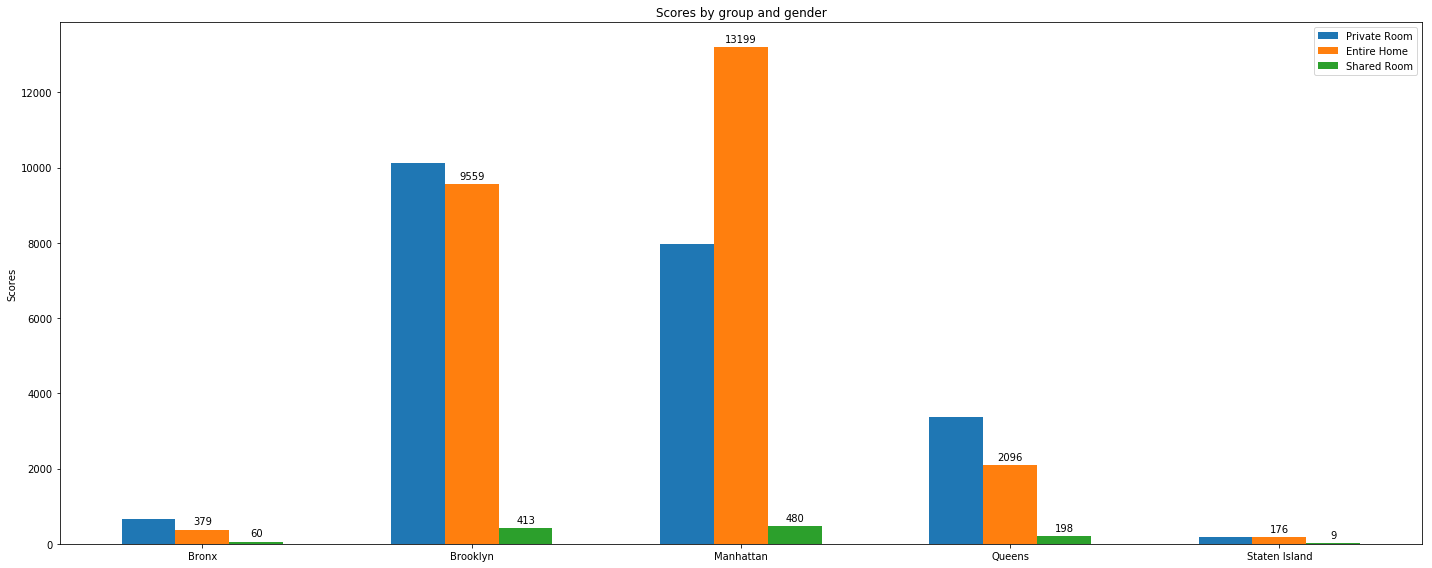

In [102]:
labels = d.index
etr = []
pr = []
sr = []
for i in labels:
    etr.append(d.loc[i][0])
    pr.append(d.loc[i][1])
    sr.append(d.loc[i][2])
    
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 8))
rects1 = ax.bar(x - width, pr, width, label='Private Room')
rects1 = ax.bar(x, etr, width, label='Entire Home')
rects2 = ax.bar(x + width, sr, width, label='Shared Room')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

There is a trend in room type with neighbourhood group. Brooklyn has more number of private rooms

## More Cleansing and Normalization

In [109]:
# Dimension of dataset
df.shape

(48895, 14)

In [110]:
# Removing unwanted columns for training
df1 = df.drop(['id', 'name', 'host_id', 'host_name'], axis=1)

In [111]:
df1.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


**Longitude and latitude cannot be normalised like other data. This is a special method used to normalize coordinates**

In [112]:
df1['x'] = np.cos(df1['latitude'], dtype=np.float64) * np.cos(df1['longitude'], dtype=np.float64)
df1['y'] = np.cos(df1['latitude'], dtype=np.float64) * np.sin(df1['longitude'], dtype=np.float64)
df1['z'] = np.sin(df1['latitude'], dtype=np.float64)

In [113]:
df1.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,x,y,z
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,-0.141748,-0.971101,0.192015
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,-0.155116,-0.984060,0.086974
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,-0.114165,-0.992957,0.031679
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,-0.130353,-0.979287,0.154938
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,-0.116195,-0.992330,0.042182


Setting categorical variables to One-hot encoded values

In [114]:
df2 = pd.get_dummies(data=df1, prefix=['ngp', 'ng', 'rt'], columns=['neighbourhood_group', 'neighbourhood', 'room_type'], drop_first=True)

In [115]:
df2.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,x,y,z,...,ng_Williamsbridge,ng_Williamsburg,ng_Willowbrook,ng_Windsor Terrace,ng_Woodhaven,ng_Woodlawn,ng_Woodrow,ng_Woodside,rt_Private room,rt_Shared room
0,40.64749,-73.97237,149,1,9,6,365,-0.141748,-0.971101,0.192015,...,0,0,0,0,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,2,355,-0.155116,-0.984060,0.086974,...,0,0,0,0,0,0,0,0,0,0
2,40.80902,-73.94190,150,3,0,1,365,-0.114165,-0.992957,0.031679,...,0,0,0,0,0,0,0,0,1,0
3,40.68514,-73.95976,89,1,270,1,194,-0.130353,-0.979287,0.154938,...,0,0,0,0,0,0,0,0,0,0
4,40.79851,-73.94399,80,10,9,1,0,-0.116195,-0.992330,0.042182,...,0,0,0,0,0,0,0,0,0,0


In [117]:
df3 = df2.drop(['latitude', 'longitude'], axis=1)

In [118]:
df3.shape

(48895, 234)

## Towards Training

Spliting dataset to feature and target variable

In [119]:
X = df3.drop(['price'], axis=1)
y = df3[['price']]

In [120]:
X.head()

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,x,y,z,ngp_Brooklyn,ngp_Manhattan,ngp_Queens,...,ng_Williamsbridge,ng_Williamsburg,ng_Willowbrook,ng_Windsor Terrace,ng_Woodhaven,ng_Woodlawn,ng_Woodrow,ng_Woodside,rt_Private room,rt_Shared room
0,1,9,6,365,-0.141748,-0.971101,0.192015,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,45,2,355,-0.155116,-0.984060,0.086974,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,1,365,-0.114165,-0.992957,0.031679,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,270,1,194,-0.130353,-0.979287,0.154938,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,9,1,0,-0.116195,-0.992330,0.042182,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Normalizing other data

In [121]:
from sklearn import preprocessing

In [122]:
min_max_scaler = preprocessing.MinMaxScaler()

In [123]:
x = X[['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']]
x_scaled = min_max_scaler.fit_transform(x)
newX = pd.DataFrame(x_scaled)

In [124]:
X[['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']] = newX

In [125]:
X.head()

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,x,y,z,ngp_Brooklyn,ngp_Manhattan,ngp_Queens,...,ng_Williamsbridge,ng_Williamsburg,ng_Willowbrook,ng_Windsor Terrace,ng_Woodhaven,ng_Woodlawn,ng_Woodrow,ng_Woodside,rt_Private room,rt_Shared room
0,0.000000,0.014308,0.015337,1.000000,-0.141748,-0.971101,0.192015,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.000000,0.071542,0.003067,0.972603,-0.155116,-0.984060,0.086974,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.001601,0.000000,0.000000,1.000000,-0.114165,-0.992957,0.031679,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0.000000,0.429253,0.000000,0.531507,-0.130353,-0.979287,0.154938,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.007206,0.014308,0.000000,0.000000,-0.116195,-0.992330,0.042182,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
y_scaler = preprocessing.MinMaxScaler()

In [127]:
y_scaled = y_scaler.fit_transform(y)
newy = pd.DataFrame(y_scaled, columns=['price'])
newy.head()

,price
0,0.0149
1,0.0225
2,0.0150
3,0.0089
4,0.0080


In [128]:
y = newy

In [129]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch.nn.functional as F
import torch.nn as nn

In [130]:
dft = TensorDataset(torch.tensor(X.values, dtype=torch.float32), torch.tensor(y.values, dtype=torch.float32))

In [131]:
X.iloc[0]

minimum_nights                    0.000000
number_of_reviews                 0.014308
calculated_host_listings_count    0.015337
availability_365                  1.000000
x                                -0.141748
                                    ...   
ng_Woodlawn                       0.000000
ng_Woodrow                        0.000000
ng_Woodside                       0.000000
rt_Private room                   1.000000
rt_Shared room                    0.000000
Name: 0, Length: 233, dtype: float64

In [143]:
per = 0.7
train_len = int(len(dft)*per)
val_len = len(dft) - train_len

Spliting dataset to `70%` training and `30%` for validation

In [144]:
train_ds, val_ds = random_split(dft, [train_len, val_len])

In [145]:
batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size*2)

In [146]:
input_size = X.shape[1]
output_size = 1

In [147]:
input_size

233

## Training and Validation

In [148]:
def evaluate(model, train_loader, val_loader):
    outputs_t = [model.validation_step(batch) for batch in train_loader]
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs_t, outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, train_loader, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

### Model Architecture
![Architecture](https://dkowsikpai.pythonanywhere.com/media/post_pics/nn.png)

In this model, we have `233` input features. `2` hidden layers are set. Output size is `1` since, it is a **regression** model

In [149]:
class AirbnbModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(input_size, 128)
        self.linear2 = nn.Linear(128, 64)
#         self.linear1 = nn.Linear(64, 128)
        self.drop = nn.Dropout(p=0.2)
        self.linear3 = nn.Linear(64, output_size)
        
    def forward(self, xb):
        out = self.linear1(xb)
        out = F.relu(out)
        out = self.linear2(out)
        out = F.relu(out)
        out = self.drop(out)
        out = self.linear3(out)
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        out = self(inputs)                 # Generate predictions
        loss = F.mse_loss(out, targets)    # Calculate loss
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch 
        out = self(inputs)                 # Generate predictions
        loss = F.mse_loss(out, targets)    # Calculate loss
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs_t, outputs):
        batch_losses_t = [x['val_loss'] for x in outputs_t]
        epoch_loss_t = torch.stack(batch_losses_t).mean()   # Combine losses
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'train_loss': epoch_loss_t.item(), 'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}".format(epoch, result['val_loss']))
    
model = AirbnbModel()

In [186]:
history += [evaluate(model, train_loader, val_loader)]
history

[{'train_loss': 0.0005053869681432843, 'val_loss': 0.0006252516759559512},
 {'train_loss': 0.0005037403316237032, 'val_loss': 0.0006240811781026423},
 {'train_loss': 0.0005057830712758005, 'val_loss': 0.0006230519502423704},
 {'train_loss': 0.000512746861204505, 'val_loss': 0.0006244319956749678},
 {'train_loss': 0.0005052375490777194, 'val_loss': 0.0006253038300201297},
 {'train_loss': 0.0005033071502111852, 'val_loss': 0.0006221255753189325},
 {'train_loss': 0.0005043221754021943, 'val_loss': 0.0006255984189920127},
 {'train_loss': 0.0005038846866227686, 'val_loss': 0.0006249690777622163},
 {'train_loss': 0.0005037390510551631, 'val_loss': 0.0006223718519322574},
 {'train_loss': 0.0005051261396147311, 'val_loss': 0.0006232784944586456},
 {'train_loss': 0.0005027929437346756, 'val_loss': 0.0006247315322980285}]

In [187]:
history += fit(10, 0.1, model, train_loader, val_loader)

Epoch [0], val_loss: 0.0006
Epoch [1], val_loss: 0.0006
Epoch [2], val_loss: 0.0006
Epoch [3], val_loss: 0.0006
Epoch [4], val_loss: 0.0006
Epoch [5], val_loss: 0.0006
Epoch [6], val_loss: 0.0006
Epoch [7], val_loss: 0.0006
Epoch [8], val_loss: 0.0006
Epoch [9], val_loss: 0.0006


In [188]:
history += fit(10, 0.01, model, train_loader, val_loader)

Epoch [0], val_loss: 0.0006
Epoch [1], val_loss: 0.0006
Epoch [2], val_loss: 0.0006
Epoch [3], val_loss: 0.0006
Epoch [4], val_loss: 0.0006
Epoch [5], val_loss: 0.0006
Epoch [6], val_loss: 0.0006
Epoch [7], val_loss: 0.0006
Epoch [8], val_loss: 0.0006
Epoch [9], val_loss: 0.0006


In [189]:
result = evaluate(model, train_loader, val_loader)
result

{'train_loss': 0.0004923326196148992, 'val_loss': 0.0006146208615973592}

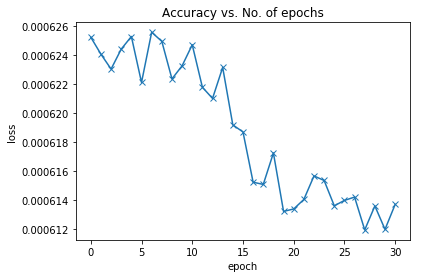

In [191]:
accuracies = [x['val_loss'] for x in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Accuracy vs. No. of epochs');

## Testing

In [176]:
def predict_single(x, model):
    xb = x.unsqueeze(0)
    return model(x).item()

In [177]:
# Predicting on 50 datapoints
tar = []
pre = []
for i in range(50, 100):
    x, target = val_ds[i]
    pred = predict_single(x, model)
    # print("Input: ", x)
    data = y_scaler.inverse_transform(np.array([target.item(), pred]).reshape(-1, 1)).tolist()
    tar.append(data[0][0])
    pre.append(data[1][0])

In [178]:
x_axis = np.arange(50, 100, 1)

Plotting variation of actual data and predicted data.

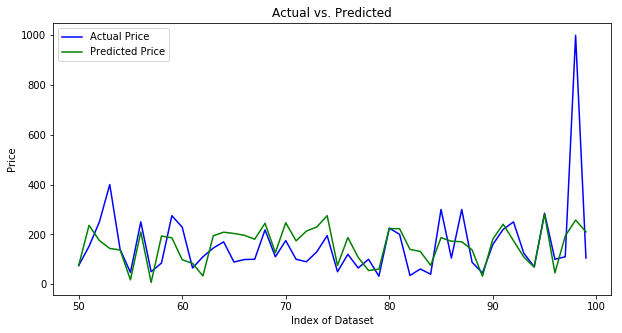

In [179]:
plt.figure(figsize=(10, 5))
plt.xlabel("Index of Dataset")
plt.ylabel("Price")
plt.title("Actual vs. Predicted")
plt.plot(x_axis, tar, 'b', label="Actual Price")
plt.plot(x_axis, pre, 'g', label="Predicted Price")
plt.legend()
plt.show()

In [180]:
def predict(i):
    x, target = val_ds[i]
    pred = predict_single(x, model)
    # print("Input: ", x)
    data = y_scaler.inverse_transform(np.array([target.item(), pred]).reshape(-1, 1)).tolist()
    print("Target: ", data[0][0])
    print("Predicted:", data[1][0])

In [181]:
predict(61)

Target:  65.00000134110451
Predicted: 83.81625637412071


## Save Model

### Save Pytorch model

In [182]:
torch.save(model.state_dict(), 'Airbnb-linear.pth')

### Save scaler model

In [183]:
from joblib import dump, load

In [184]:
dump(min_max_scaler, 'x_scaler.joblib')
dump(y_scaler, 'y_scaler.joblib')

['y_scaler.joblib']

In [185]:
jovian.log_metrics(test_loss=result['val_loss'], test_acc=result['val_loss'])

[jovian] Metrics logged.


## Conclusion

### Summary
 - We have successfully created model using pytorch. 
 - We have also done EDA analysis of dataset and seen different trends in dataset. 
 - Finally, we have saved the model. 
 - Anyway our model is not catching certain special cases, with more data we can develop the model further.

### Future Scopes
- Our model is now specific to New York dataset. This can be extened to other regions where Airbnb operate, by just providing enough datapoints. 
- Our model can be used as pre-trained model for other rental price prediction problems, with littile bit of tweaks.

## Publishing

In [194]:
jovian.commit(project='airbnb-pytorch-nn', 
              environment=None, 
              outputs=['Airbnb-linear.pth', 'x_scaler.joblib', 'y_scaler.joblib', 'AB_NYC_2019.csv', 'Screenshots'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "dkowsikpai/airbnb-pytorch-nn" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Uploading additional outputs...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/dkowsikpai/airbnb-pytorch-nn


'https://jovian.ai/dkowsikpai/airbnb-pytorch-nn'